# Image preprocessing

In [1]:
import data_reader
import dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_path = "D:/data/WSI/COAD/gdc_download_20220621_122126.709207"

sample_sheet = pd.read_csv("D:/data/WSI/COAD/sample_sheet.tsv", sep="\t") # Sample Sheet data for TS samples

PREPROCESS = False
DATA_SET_NAME = "data_set_x20_100%_unsorted"

# Two recurrent tumor images, deleted

In [3]:
SPLITS = [0,2]#,3,4,5,6,7,8,9]
if PREPROCESS == True: # Choosing to preprocess the data or not
    
    for SPLIT in SPLITS:
        print(f"Procesando SPLIT: {SPLIT}")

        SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"

        case_id = open(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\splits\\testsplit{SPLIT}.txt", "r").read().split()

        # Obtaining the files for the cases in the used split
        file_ids  = [sample_sheet["File ID"][idx] for idx, case in enumerate(sample_sheet["Case ID"]) if (case in case_id)]
        paths = [data_path + "\\" + file_id for file_id in file_ids] # All case folders paths

        data_r = data_reader.Data_reader(
            folder_name="gdc_download_20220621_122126.709207",
            formats=[".svs"])

        data_set = data_r.read_data(
                paths,
                patch_size=512,
                name=SPLIT_NAME)

train_set = dataset.PatchDataset([], [], [])

for SPLIT in SPLITS:
    SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"

    #SPLIT_NAME = "test"
    
    print(f"Loading split: {SPLIT}")
    X_, y_, n , ids = data_reader.read_lmdb(f"D:/data/WSI/COAD/patches/{SPLIT_NAME}")

    train_set.inputs.extend(X_)
    train_set.labels.extend(y_)
    train_set.case_ids.extend(ids)

print(n)
print(f"Patches : {len(train_set)}\n")

X, y, case_id = train_set.inputs, train_set.labels, train_set.case_ids


Procesando SPLIT: 0


100%|██████████| 136/136 [46:33<00:00, 20.54s/it]


50.0
Procesando SPLIT: 2


100%|██████████| 137/137 [46:08<00:00, 20.21s/it] 


50.0
Loading split: 0
Read lmdb
Loading split: 2
Read lmdb
41426
Patches : 39790



In [16]:
print(len(y))
print(len(X))
#print(case_id)

807
807


233
[0 1 0]


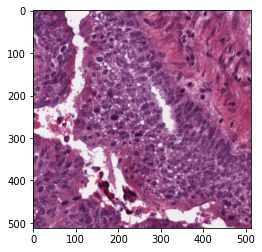

In [14]:
#negative = [i for i in case_id if "11" in(i)]
#print(negative)

example_idx = ids.index("X_TCGA-AA-3712-01A_233")

print(example_idx)

plt.imshow(X[example_idx].reshape(512, 512, 3))
print(y[example_idx])

In [15]:

for SPLIT in range(10):
    train_set = dataset.PatchDataset([], [], [])
    SPLIT_NAME = DATA_SET_NAME + f"_SPLIT{SPLIT}"
    
    print(f"Loading split: {SPLIT}")
    X_, y_, n , ids = data_reader.read_lmdb(f"D:/data/WSI/COAD/patches/{SPLIT_NAME}")

    train_set.inputs.extend(X_)
    train_set.labels.extend(y_)
    train_set.case_ids.extend(ids)

    X, y, case_id = train_set.inputs, train_set.labels, train_set.case_ids

    negative = [(i[0]==1) for i in y].count(True)
    coad = [(i[1]==1) for i in y].count(True)
    read = [(i[2]==1) for i in y].count(True)

    print(f"Number of patches in split {SPLIT}: ", len(y))
    print("Percentage of negative patches: ", negative/len(y))
    print("Percentage of read patches: ", read/len(y))

Loading split: 0
Read lmdb
Number of patches in split 0:  807
Percentage of negative patches:  0.21189591078066913
Percentage of read patches:  0.0


Number of patches:  1056
Percentage of positive patches:  0.045454545454545456


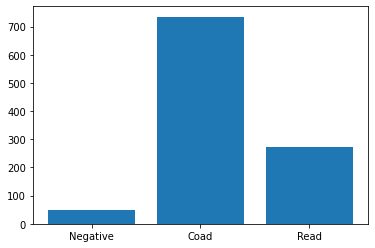

In [14]:
negative = [(i[0]==1) for i in y].count(True)
coad = [(i[1]==1) for i in y].count(True)
read = [(i[2]==1) for i in y].count(True)
plt.bar(["Negative", "Coad", "Read"], [negative ,coad, read])

print("Number of patches: ", len(y))
print("Percentage of positive patches: ", negative/len(y))

[[[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 ...

 [[107  54 108]
  [103  48 106]
  [102  45 103]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[119  66 120]
  [112  56 115]
  [107  50 110]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[131  74 128]
  [121  62 122]
  [113  54 115]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]]
(512, 512, 3)


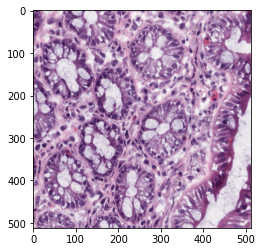

In [8]:
idx = 200

#print(y[idx])

print(X[0])

print(X[idx].shape)

plt.imshow(X[idx].reshape(512, 512, 3))